In [2]:
import pandas as pd 
import numpy as np 

In [9]:
df = pd.read_csv("../data/raw/Solar_Power_Plant_Data.csv")
df.head()

,Date-Hour(NMT),WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction
0,01.01.2017-00:00,0.6,0,1003.8,-7.4,0.1,97,0.0
1,01.01.2017-01:00,1.7,0,1003.5,-7.4,-0.2,98,0.0
2,01.01.2017-02:00,0.6,0,1003.4,-6.7,-1.2,99,0.0
3,01.01.2017-03:00,2.4,0,1003.3,-7.2,-1.3,99,0.0
4,01.01.2017-04:00,4.0,0,1003.1,-6.3,3.6,67,0.0


In [10]:
df.shape

(8760, 8)

In [11]:
df.columns

Index(['Date-Hour(NMT)', 'WindSpeed', 'Sunshine', 'AirPressure', 'Radiation',
       'AirTemperature', 'RelativeAirHumidity', 'SystemProduction'],
      dtype='str')

In [12]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date-Hour(NMT)       8760 non-null   str    
 1   WindSpeed            8760 non-null   float64
 2   Sunshine             8760 non-null   int64  
 3   AirPressure          8760 non-null   float64
 4   Radiation            8760 non-null   float64
 5   AirTemperature       8760 non-null   float64
 6   RelativeAirHumidity  8760 non-null   int64  
 7   SystemProduction     8760 non-null   float64
dtypes: float64(5), int64(2), str(1)
memory usage: 547.6 KB


In [13]:
df.head()

,Date-Hour(NMT),WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction
0,01.01.2017-00:00,0.6,0,1003.8,-7.4,0.1,97,0.0
1,01.01.2017-01:00,1.7,0,1003.5,-7.4,-0.2,98,0.0
2,01.01.2017-02:00,0.6,0,1003.4,-6.7,-1.2,99,0.0
3,01.01.2017-03:00,2.4,0,1003.3,-7.2,-1.3,99,0.0
4,01.01.2017-04:00,4.0,0,1003.1,-6.3,3.6,67,0.0


In [15]:
df['Date-Hour(NMT)'] = pd.to_datetime(df['Date-Hour(NMT)'],format="%d.%m.%Y-%H:%M")

In [16]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date-Hour(NMT)       8760 non-null   datetime64[us]
 1   WindSpeed            8760 non-null   float64       
 2   Sunshine             8760 non-null   int64         
 3   AirPressure          8760 non-null   float64       
 4   Radiation            8760 non-null   float64       
 5   AirTemperature       8760 non-null   float64       
 6   RelativeAirHumidity  8760 non-null   int64         
 7   SystemProduction     8760 non-null   float64       
dtypes: datetime64[us](1), float64(5), int64(2)
memory usage: 547.6 KB


In [18]:
df = df.sort_values("Date-Hour(NMT)")

In [19]:
df = df.set_index("Date-Hour(NMT)")

In [22]:
print(df.index.freq)

None


In [23]:
df.index.to_series().diff().value_counts().head()

Date-Hour(NMT)
0 days 01:00:00    8759
Name: count, dtype: int64

In [26]:
df = df.asfreq('h')
df.index.freq

<Hour>

In [27]:
import matplotlib.pyplot as plt

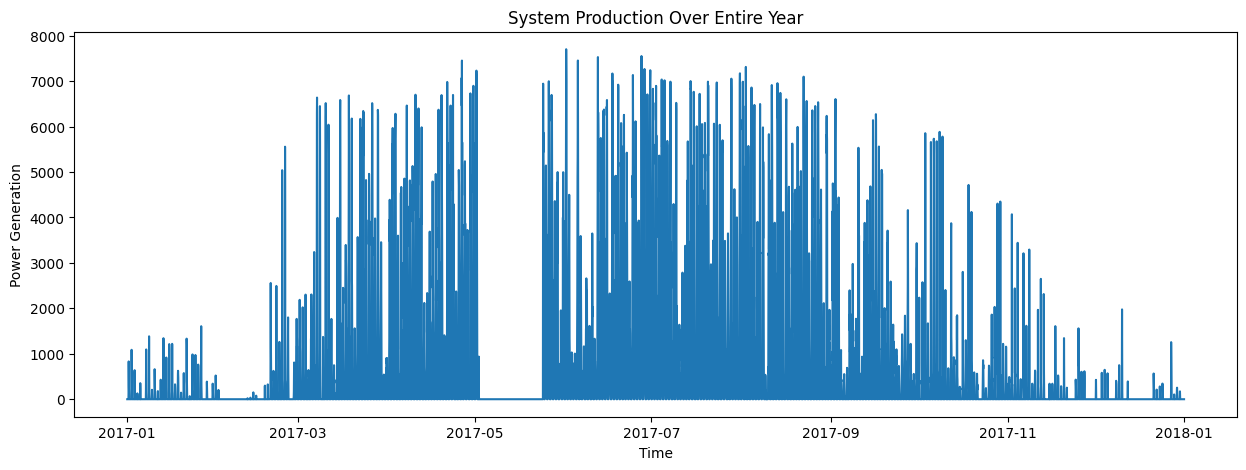

In [28]:
plt.figure(figsize=(15,5))
plt.plot(df['SystemProduction'])
plt.title("System Production Over Entire Year")
plt.xlabel("Time")
plt.ylabel("Power Generation")
plt.show()

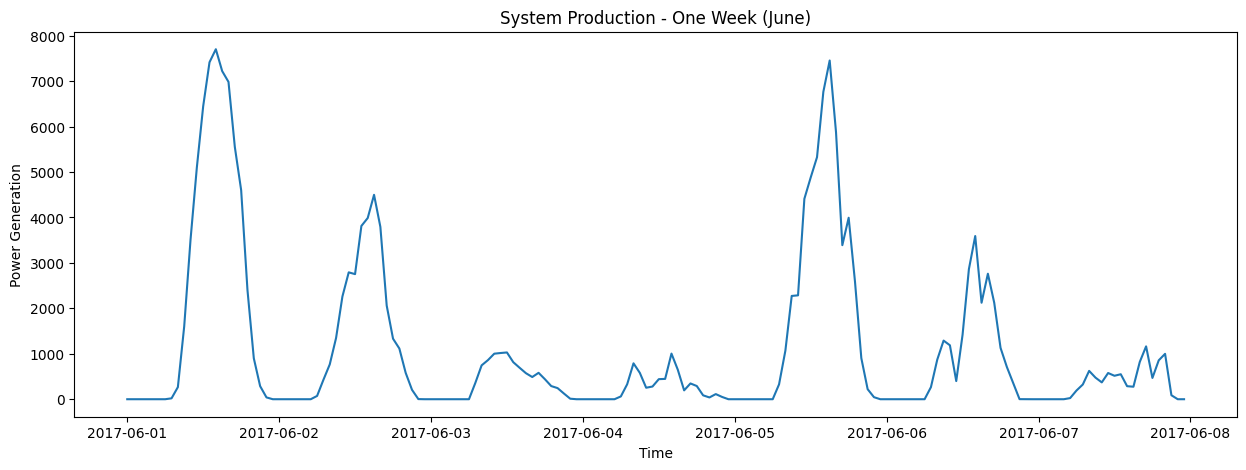

In [29]:
one_week = df["2017-06-01":"2017-06-07"]

plt.figure(figsize=(15,5))
plt.plot(one_week["SystemProduction"])
plt.title("System Production - One Week (June)")
plt.xlabel("Time")
plt.ylabel("Power Generation")
plt.show()

In [30]:
df["hour"]=df.index.hour
df["day_of_week"]=df.index.dayofweek
df["month"]=df.index.month

In [31]:
df[["hour","day_of_week","month"]].head()

,hour,day_of_week,month
Date-Hour(NMT),,,
2017-01-01 00:00:00,0,6,1
2017-01-01 01:00:00,1,6,1
2017-01-01 02:00:00,2,6,1
2017-01-01 03:00:00,3,6,1
2017-01-01 04:00:00,4,6,1


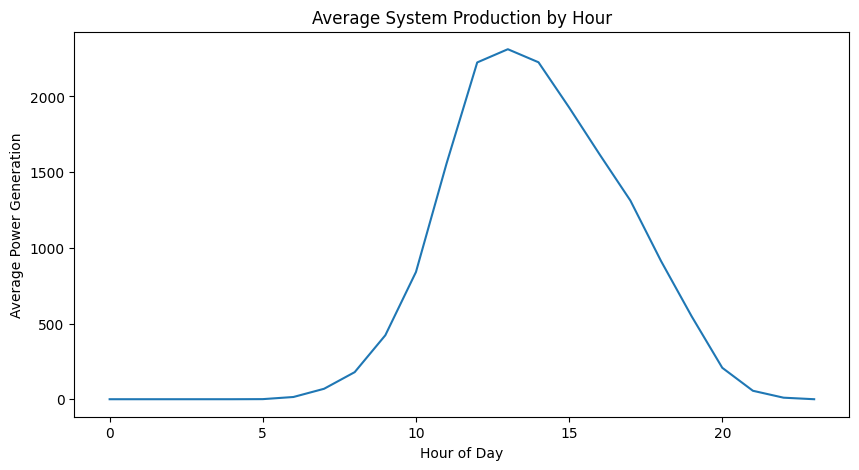

In [33]:
hourly_avg = df.groupby("hour")["SystemProduction"].mean()

plt.figure(figsize=(10,5))
plt.plot(hourly_avg)
plt.title("Average System Production by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Average Power Generation")
plt.show()

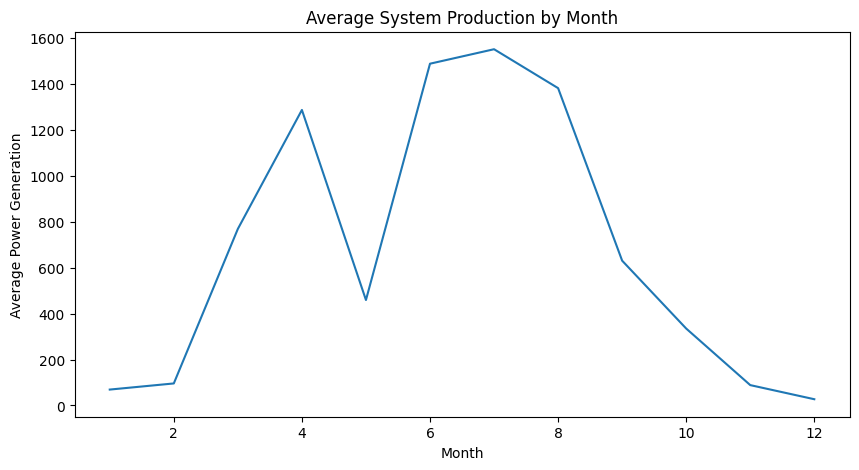

In [34]:
monthly_avg = df.groupby("month")["SystemProduction"].mean()

plt.figure(figsize=(10,5))
plt.plot(monthly_avg)
plt.title("Average System Production by Month")
plt.xlabel("Month")
plt.ylabel("Average Power Generation")
plt.show()

In [36]:
df["lag_1"] = df["SystemProduction"].shift(1)
df["lag_24"] = df["SystemProduction"].shift(24)
df["lag_168"] = df["SystemProduction"].shift(168)  # one week

In [37]:
df = df.dropna()